# Project: **Data Jobs Salaries in Mexico in August 2022**
___
___
## **3. Data Analysis and Visualization**
___

Author: **Daniel Eduardo López**

GitHub: **_https://github.com/DanielEduardoLopez_**

LinkedIn: **_https://www.linkedin.com/in/daniel-eduardo-lopez_**

Email: **_daniel-eduardo-lopez@outlook.com_**
___

The purpose of the present notebook is to perform the **Data Analysis and Visualization** of the cleaned dataset in order to answer the main research question as well as obtaining further insights from the data.

**Main Question:**
Which data job category has the highest salary in the Mexican labor market in August 2022 according to the OCC website?
- Business Analyst
- Data Analyst
- Data Architect
- Data Engineer
- Data Scientist

It is hypothesed that **Data Scientist** positions are the ones with the highest salaries as per the famous statement that Data Science is "The Sexiest Job of the 21st Century" (Davenport & Patil, 2012). Nonetheless, that was confirmed or rejected with factual data below.

To do so, first, the dataset was loaded to a Pandas dataframe. Then, the data was analyzed through some descriptive statistical calculations with Pandas and Numpy libraries. Moreover, to gain further understanding and insights through visualizations, the Matplotlib, Seaborn and Folium libraries were used.


**References:**

- **Davenport, T.H. & Patil, D.J. (2012).** *Data Scientist: The Sexiest Job of the 21st Century*. Harvard Business Review 90(10): 70-76.

### **3.1. Data loading**
___

In [83]:
# Installation of some missing libraries
#!pip install folium
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
# Libraries importation
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import squarify
import scipy.stats as stats
import statsmodels.stats.diagnostic as std
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [85]:
# For a ggplot-like plotting style
mpl.style.use('ggplot') 

In [86]:
# Loading of the dataframe with the cleaned data
df = pd.read_csv('Dataset_Clean.csv')

### **3.2. What is the Most Demanded Data Job?**
___

In [87]:
# Basic info of the first dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job             444 non-null    object 
 1   Company         444 non-null    object 
 2   Location        444 non-null    object 
 3   Average Salary  157 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.0+ KB


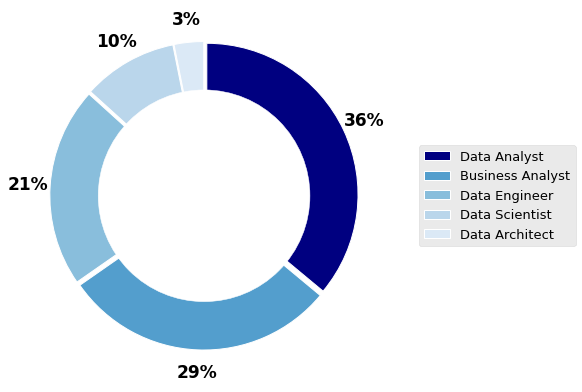

In [88]:
# Donut chart of the data jobs demand with Matplotlib
fig, ax = plt.subplots(figsize = (9, 14))
colors = sns.color_palette('Blues_r')
explode = [0.02] * 5
wedges, texts, autotexts = ax.pie(x = list(df['Job'].value_counts().values), wedgeprops=dict(edgecolor='w', linewidth= 1),
        textprops = dict(size=17, weight="bold", color = 'black'), colors = ['navy',colors[2],colors[3],colors[4],colors[5]], 
        autopct='%.0f%%', pctdistance=1.15, startangle = 90, counterclock = False, explode = explode)
center = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(center)
plt.legend(wedges, list(df['Job'].value_counts().keys()), fontsize=13, loc="center right", bbox_to_anchor=(1.2, 0, 0.3, 1))
plt.tight_layout()
plt.show()

In [89]:
# Donut chart of the data jobs demand with Plotly

job_df = pd.DataFrame(df['Job'].value_counts().reset_index().rename(columns = {'index': 'Job', 'Job': 'Count'}))

pie_colors = ['#06477D','#84BDEC','#B4D4EF', '#C8E4FC','aliceblue']

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'scale': 2 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

fig = px.pie(job_df, values='Count', names='Job', color = 'Job', hole = 0.7,  
                           color_discrete_sequence=px.colors.sequential.Blues_r,
                           height= 500,
                           width = 700,
                           title='Demand of Data Jobs Per Category')
fig.update_layout(title_x=0.5, font=dict(size=14))
fig.update_traces(hoverinfo='label+percent+name', textinfo='percent', textfont_size=18,
                    marker=dict(colors=pie_colors, line=dict(color='white', width=4)))
fig.show(config=config)

From the above plot, it is possible to conclude that more than a third of the data jobs (**36%**) correspond to positions of **Data Analyst**, rendering them as **the most demanded** ones in the Mexican labor market at the time of this study (August 2022). In second place, it is possible to found the positions of **Business Analyst** with a **29%** of the total. 

Furthermore, it is noteworthy that **Data Engineer** positions are more demanded than **Data Scientist** positions with a **21%** and an **10%**, respectively. 

On the contrary, **Data Architect** positions are the less demanded, with only a **3%** out of the total.



### **3.3. Where do the Most Data Jobs Locate?**
___

In [90]:
# States dictionary with corresponding ID
states_dict = {'Aguascalientes': 'AS', 
            'Baja California': 'BC', 
            'Baja California Sur': 'BS', 
            'Campeche': 'CC',
            'Ciudad de México':'DF',
            'Chiapas': 'CS',
            'Chihuahua':'CH',
            'Coahuila':'CL',
            'Colima':'CM',
            'Durango':'DG',
            'Estado de México':'MC',
            'Guanajuato':'GT',
            'Guerrero':'GR',
            'Hidalgo':'HG',
            'Jalisco':'JC',
            'Michoacán':'MN',
            'Morelos':'MS',
            'Nayarit':'NT',
            'Nuevo León':'NL',
            'Oaxaca':'OC',
            'Puebla':'PL',
            'Querétaro':'QT',
            'Quintana Roo':'QR',
            'San Luis Potosí':'SP',
            'Sinaloa':'SL',
            'Sonora':'SR',
            'Tabasco':'TC',
            'Tamaulipas':'TS',
            'Tlaxcala':'TL',
            'Veracruz':'VZ',
            'Yucatán':'YN',
            'Zacatecas':'ZS'}

states_df = pd.DataFrame.from_dict(states_dict, orient='index').reset_index().rename(columns={"index": "State", 0: "ID"}).set_index('State')
states_df.head()

,ID
State,
Aguascalientes,AS
Baja California,BC
Baja California Sur,BS
Campeche,CC
Ciudad de México,DF


In [91]:
# Calculating the Demand Percentage per State

demand = pd.DataFrame(df['Location'].value_counts())
total = sum(demand['Location'])
demand['Percentage'] = (demand['Location']) / total *100
demand = demand.reset_index().rename(columns={"index": "State", "Location": "Count"})
demand.head()


,State,Count,Percentage
0,Ciudad de México,260,58.558559
1,Nuevo León,58,13.063063
2,Estado de México,56,12.612613
3,Jalisco,24,5.405405
4,Querétaro,16,3.603604


In [92]:
# Final DataFrame for the Choropleth map visualization
states_demand_df = states_df.merge(demand, left_on='State', right_on='State', how = 'outer').fillna(0)
states_demand_df.head()

,State,ID,Count,Percentage
0,Aguascalientes,AS,1.0,0.225225
1,Baja California,BC,2.0,0.450450
2,Baja California Sur,BS,0.0,0.000000
3,Campeche,CC,0.0,0.000000
4,Ciudad de México,DF,260.0,58.558559


In [93]:
# Mexican States Latitude and Longitud

states_lat_long_dict = {'Aguascalientes': (21.87945992,	-102.2904135),
                  'Baja California': (32.663214,-115.4903741),
                  'Baja California Sur': (24.1584937,-110.315928),
                  'Campeche': (19.8450352,-90.5381231),
                  'Chiapas': (16.7541485,-93.119001),
                  'Chihuahua': (28.6349557,-106.0777049),
                  'Coahuila': (25.4286965,-100.9994484),
                  'Colima': (19.2408324,-103.7291389),
                  'Ciudad de México': (19.4335493,-99.1344048),
                  'Durango': (24.0241017,-104.6708325),
                  'Guanajuato': (21.0176446,-101.2586863),
                  'Guerrero': (17.5516921,-99.5025877),
                  'Hidalgo': (20.1183855,-98.7540094),
                  'Jalisco': (20.6773775,-103.3494204),
                  'Estado de México': (19.289191,-99.6670425),
                  'Michoacán': (19.7030535,-101.1937953),
                  'Morelos': (18.9218499,-99.2353856),
                  'Nayarit': (21.5122308,-104.8948845),
                  'Nuevo León': (25.6717637,-100.3163831),
                  'Oaxaca': 	(17.0617935,-96.7271634),
                  'Puebla': (19.0428817,-98.2002919),
                  'Querétaro': (20.37998212,	-100.0000308),
                  'Quintana Roo': (18.4978052,-88.3029951),
                  'San Luis Potosí': (22.1521646,-100.9765552),
                  'Sinaloa': (24.8082702,-107.3945828),
                  'Sonora': (29.0748734,-110.9597578),
                  'Tabasco': (17.9882632,-92.9209807),
                  'Tamaulipas': (23.7312703,-99.1517694),
                  'Tlaxcala': (19.3171271,-98.2386354),
                  'Veracruz': (19.5269375,-96.92401),
                  'Yucatán': (20.9664386,-89.623114),
                  'Zacatecas': (22.7753476,-102.5740002)}
                
states_lat_long = pd.DataFrame.from_dict(states_lat_long_dict, orient='index').reset_index().\
                    rename(columns={"index": "State", 0: "Lat", 1: "Long"}).set_index('State')
states_lat_long.head()

,Lat,Long
State,,
Aguascalientes,21.879460,-102.290413
Baja California,32.663214,-115.490374
Baja California Sur,24.158494,-110.315928
Campeche,19.845035,-90.538123
Chiapas,16.754148,-93.119001


In [94]:
# Join of the job data dataframe with the Mexican States latitude and longitud
jobs_loc = df.merge(states_lat_long, left_on='Location', right_on='State', how = 'inner')
jobs_loc.head()

,Job,Company,Location,Average Salary,Lat,Long
0,Data Analyst,P3 Impulsores Estrategicos,Ciudad de México,50000.0,19.433549,-99.134405
1,Data Analyst,Corporativo Mek De México,Ciudad de México,NaN,19.433549,-99.134405
2,Data Analyst,Fidelity Marketing S.A De C.V,Ciudad de México,NaN,19.433549,-99.134405
3,Data Analyst,Universidad Tecnológica De México,Ciudad de México,13150.0,19.433549,-99.134405
4,Data Analyst,Laboratorios Médicos Del Chopo,Ciudad de México,NaN,19.433549,-99.134405


In [95]:
# Function to assign job color
def assign_job_color(job):
  if job == 'Data Analyst':
    return 'blue'
  elif job == 'Business Analyst':
    return 'green'
  elif job == 'Data Engineer':
    return 'black'
  elif job == 'Data Scientist':
    return 'red'
  elif job == 'Data Architect':
    return 'yellow'


In [96]:
# Assigning of different colors to the different job categories
jobs_loc['Marker Color'] = jobs_loc['Job'].apply(assign_job_color)
jobs_loc.head()

,Job,Company,Location,Average Salary,Lat,Long,Marker Color
0,Data Analyst,P3 Impulsores Estrategicos,Ciudad de México,50000.0,19.433549,-99.134405,blue
1,Data Analyst,Corporativo Mek De México,Ciudad de México,NaN,19.433549,-99.134405,blue
2,Data Analyst,Fidelity Marketing S.A De C.V,Ciudad de México,NaN,19.433549,-99.134405,blue
3,Data Analyst,Universidad Tecnológica De México,Ciudad de México,13150.0,19.433549,-99.134405,blue
4,Data Analyst,Laboratorios Médicos Del Chopo,Ciudad de México,NaN,19.433549,-99.134405,blue


In [97]:
# Initialization of map
m = folium.Map(location=[24,-105], zoom_start=5)

# Setting of the Choropleth
folium.Choropleth(
    geo_data = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json',
    name = "Data Jobs Localization",
    data = states_demand_df,
    columns = ["ID", "Percentage"],
    key_on = "feature.id",
    fill_color = "Blues",
    fill_opacity = 0.7,
    line_opacity = 0.1,
    legend_name = "Data Jobs Demand (%)",
).add_to(m)

marker_cluster = MarkerCluster()
m.add_child(marker_cluster)

# Adding of individual markers to clusters
for index, record in jobs_loc.iterrows():
    marker = folium.Marker(list(record[4:6]),
                           icon = folium.Icon(color='white', icon_color=str(record[-1])))
    marker_cluster.add_child(marker)

# Setting of the Layer Control
folium.LayerControl().add_to(m)

# Showing the map
m


In [98]:
# Choropleth map with Plotly

location_df = states_df.merge(demand, left_on='State', right_on='State', how = 'outer').fillna(0)

fig = px.choropleth(location_df, 
                            geojson = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json', 
                            locations='ID', 
                            color='Percentage',
                            color_continuous_scale="Blues",
                            scope="north america",
                            #title='Demand of Data Jobs per Mexican State',
                            labels={'Percentage':'National Demand %'},
                            height= 500,
                            width = 800                 
                            )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_x=0.5, font=dict(size=14))
fig.update_geos(fitbounds="locations", visible=False)
fig.show(config=config)

The above map strongly suggests that **most of the data jobs are concentrated in the capital Mexico City** with almost **60%** of the demand at the moment of this study (August 2022). 

On the other hand, according to the data, **Nuevo León**, and **State of Mexico** (**"Estado de México"** in Spanish) represent distant second places, with only about **13%** of the total demand.

**Reference for JSON file:**

**Arroyo-Velázquez, M. I. (2022)**. _states_mx_. https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json

### **3.4. How is the Data Jobs Demand Per State?**
___

In [99]:
# Data jobs per State
jobs_per_state_pivot = df.pivot_table(index = 'Location', columns = 'Job', values = 'Company', aggfunc = 'count').fillna(0).reset_index()
jobs_per_state_pivot['Total'] = jobs_per_state_pivot.sum(axis=1, numeric_only= True)
jobs_per_state_pivot = jobs_per_state_pivot.sort_values('Total', ascending = True)
jobs_per_state_pivot.head()

Job,Location,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total
0,Aguascalientes,1.0,0.0,0.0,0.0,0.0,1.0
15,Tamaulipas,0.0,1.0,0.0,0.0,0.0,1.0
14,Sonora,1.0,0.0,0.0,0.0,0.0,1.0
9,Oaxaca,0.0,1.0,0.0,0.0,0.0,1.0
12,Quintana Roo,1.0,1.0,0.0,0.0,0.0,2.0


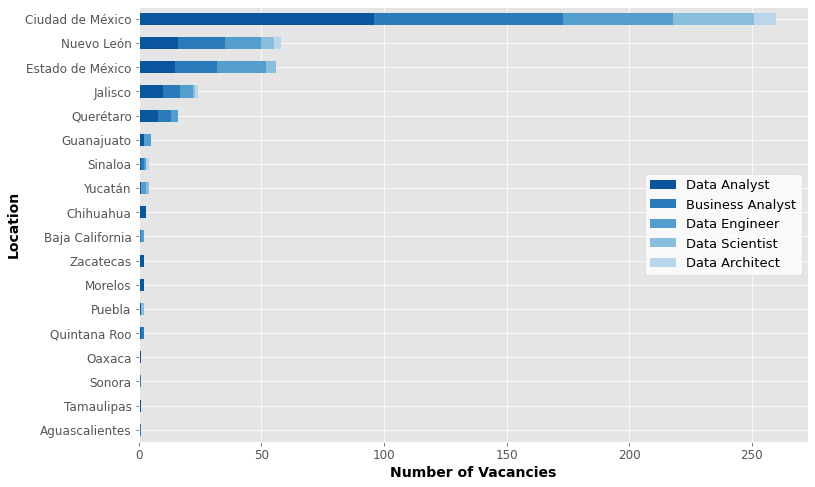

In [100]:
# Stack bar chart of Data jobs per State
jobs_per_state_pivot.set_index('Location').plot.barh(stacked=True, 
                                                     y = ['Data Analyst',	'Business Analyst',	'Data Engineer','Data Scientist', 'Data Architect'], 
                                                     color=sns.color_palette('Blues_r'),
                                                     figsize=(12, 8) )
plt.legend(facecolor = 'white', loc = 'center right', fontsize = 13)
plt.xlabel('Number of Vacancies', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [101]:
# Stacked bar chart with Plotly

jobs_per_state_top = jobs_per_state_pivot.sort_values('Total', ascending = False)[:5].sort_values('Total', ascending = True).\
                      drop(columns = 'Total')

fig = px.bar(jobs_per_state_top, x=['Business Analyst',	'Data Analyst',	'Data Architect',	'Data Engineer',	'Data Scientist'], 
             y='Location',
            color_discrete_sequence=px.colors.sequential.Blues_r,
            height = 500,
            width = 900,
            title = 'Demand Per Data Job Category In the Most Important States',
            labels = {"value": "Vacancies", "variable": "Data Job Category"},
             barmode='stack'#'group'
             )
fig.update_layout(title_x=0.5, font=dict(size=14))
fig.show(config=config)

In [102]:
# Unpivoting the table
jobs_per_state_selected = jobs_per_state_pivot.loc[(jobs_per_state_pivot['Location'] == 'Ciudad de México') 
                                          | (jobs_per_state_pivot['Location'] == 'Estado de México') 
                                          | (jobs_per_state_pivot['Location'] == 'Jalisco') 
                                          | (jobs_per_state_pivot['Location'] == 'Nuevo León')].sort_values('Total', ascending = False)
jobs_per_state_selected = pd.melt(jobs_per_state_selected, id_vars= 'Location', value_vars = ['Business Analyst',	'Data Analyst',	'Data Architect',	'Data Engineer','Data Scientist'], 
                                    var_name= 'Data Job', value_name='Count')
jobs_per_state_selected.head()

,Location,Data Job,Count
0,Ciudad de México,Business Analyst,77.0
1,Nuevo León,Business Analyst,19.0
2,Estado de México,Business Analyst,17.0
3,Jalisco,Business Analyst,7.0
4,Ciudad de México,Data Analyst,96.0


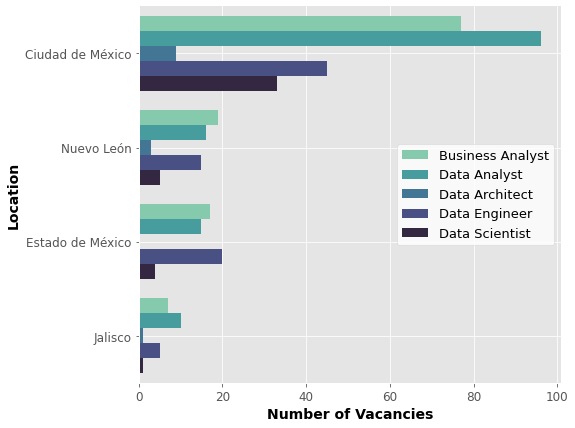

In [103]:
# Grouped bar chart of each data job for selected states
g = sns.catplot(
    data = jobs_per_state_selected, kind = "bar",
    x = "Count", y = "Location", hue = "Data Job",
    ci = "sd", palette = "mako_r", alpha = 1, height = 6,
    aspect = 1.3, legend = False
)
plt.legend(facecolor = 'white', loc = 'center right', fontsize = 13)
plt.xlabel('Number of Vacancies', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid({'both'})
plt.show()


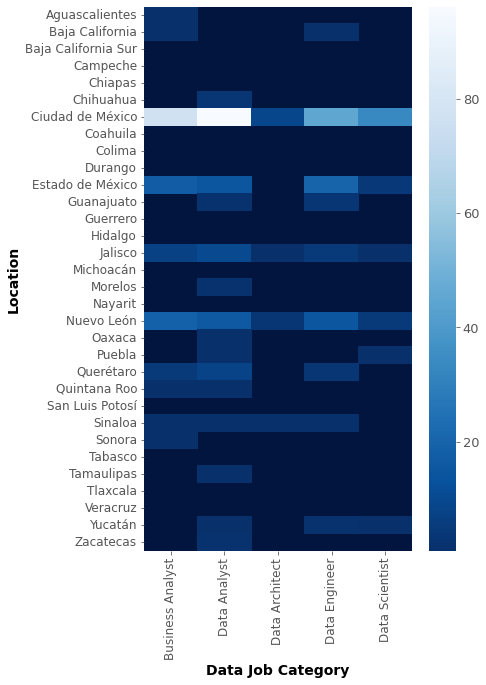

In [104]:
# Heatmap of Data jobs per State
heatmap_location_job = jobs_per_state_pivot.set_index('Location').join(states_df, how = 'outer').fillna(0).reset_index().\
                rename(columns = {'index': 'Location'}).drop(columns = ['Total','ID']).sort_values('Location', ascending = True).\
                set_index('Location')
plt.figure(figsize = (6,10))
ax = sns.heatmap(heatmap_location_job, 
            cmap = "Blues_r",
            mask = (heatmap_location_job == 0))
ax.set_facecolor('xkcd:navy')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [105]:
# Heatmap with Plotly
heatmap_px_colorscale = [(0, "#000000"), 
                      (0.03, px.colors.sequential.Blues[8]), 
                      (0.25, px.colors.sequential.Blues[6]), 
                      (0.5, px.colors.sequential.Blues[4]), 
                      (0.75, px.colors.sequential.Blues[2]), 
                      (1, "aliceblue")]

heatmap_location_job_px = pd.melt(heatmap_location_job.reset_index(), id_vars= 'Location', var_name = 'Job', value_name = 'Vacancies').\
                          sort_values(by = 'Location', ascending = False)

fig = px.density_heatmap(heatmap_location_job_px, y='Location', 
                          x = 'Job', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          #color_continuous_scale="Blues_r",
                          height=800,
                          width=700, 
                          title= 'Demand Per Location & Data Job Category',
                          labels={"Job": "Data Job Category"},
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), font=dict(size=13))
fig.update_xaxes(categoryorder='array', categoryarray= ['Business Analyst', 'Data Analyst', 'Data Architect', 'Data Engineer', 'Data Scientist'])
fig.show(config=config)

From the plots above, it is possible to observe that, undoubtedly, **Mexico City**, **Nuevo León**,  **Estado de México**, and **Jalisco** are the locations where most of the data jobs are demanded, while the rest of the country is lagging behind in terms of data jobs creation.

However, it is important to remark that the data jobs demand is largely concentrated in **Mexico City**, whereas **Nuevo León**,  **Estado de México**, and **Jalisco** are distant second, third and fourth places, respectively.

Moreover, it is noteworthy that the **Data Analyst** position is the one most demanded across the Mexican States; whereas **Data Architect** is the less demanded.



### **3.5. What are the Companies Demanding More Data Jobs?**
___

In [106]:
# Pivot table by company
company_df = pd.pivot_table(data = df, index = 'Company', columns = 'Job', values = 'Location', aggfunc = 'count').fillna(0).reset_index()
company_df['Total'] = company_df.sum(axis=1, numeric_only= True)
company_df = company_df.sort_values('Total', ascending = False)
company_df.head()

Job,Company,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total
24,Banamex,23.0,15.0,1.0,6.0,3.0,48.0
202,Softtek,5.0,6.0,1.0,4.0,1.0,17.0
89,Grupo Salinas,2.0,8.0,1.0,1.0,1.0,13.0
2,Adecco,0.0,5.0,0.0,1.0,3.0,9.0
26,Banorte,0.0,5.0,0.0,0.0,4.0,9.0


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



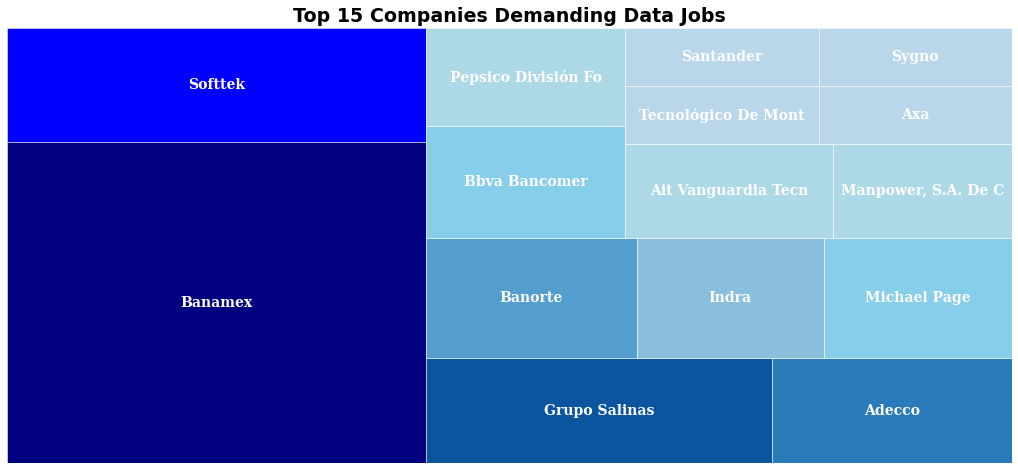

In [107]:
# Treemap of the top 15 companies demanding data jobs
top_treemap = 15
sizes = company_df['Total'][:top_treemap].values
label = company_df['Company'][:top_treemap].map(lambda x: x[:19])
colors = sns.color_palette('Blues_r')
colors_tree =['navy', 'blue', colors[0], colors[1], colors[2], colors[3], 'skyblue', 'skyblue', 'lightblue', 'lightblue', 'lightblue', colors[4], colors[4], colors[4], colors[4]]
plt.figure(figsize = (18,8))
squarify.plot(sizes = sizes, label = label, 
              alpha = 1, color = colors_tree, pad = 0, 
              text_kwargs={'fontsize': 14, 'weight': 'bold', 'family':'serif', 'color': 'w'},
              edgecolor = 'w')
plt.title(f'Top {top_treemap} Companies Demanding Data Jobs', weight = 'bold', fontsize = 19)
plt.axis('Off')
plt.show()

In [108]:
# Treemap with Plotly
top_treemap = 15
company_treemap = df.groupby(by = 'Company', as_index= False)['Job'].count().sort_values(by = 'Job', ascending = False).\
              rename(columns = {'Job': 'Vacancies'})[:top_treemap]
company_treemap['Company'] = company_treemap['Company'].map(lambda x: x[:16])

fig = px.treemap(company_treemap, path = [px.Constant("."), 'Company'], values='Vacancies', color = 'Vacancies', 
                                  color_continuous_scale=px.colors.sequential.Blues,
                                  title= f'Top {top_treemap} Companies Demanding Data Jobs',
                                  height= 600,
                                  width = 1000
                                 )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), font=dict(size=14))
fig.show(config=config)

From the plot above, it is clear that **Banamex**, **Softek** and **Grupo Salinas** are the companies with **the highest data jobs demand** at the moment of the present study. So, even though, the data jobs demand may vary along time, the current interest of such companies in data science and analytics might convert them in interesting prospects for job seekers.

It is also noteworthy that 4 banks (Banamex, Banorte, BBVA Bancomer and Satander) are part from the top 15, which suggest that **the banking sector in Mexico** is currently very interested in capitalize the huge amounts of data that their clients produce every day.

### **3.6. How is the Data Jobs Demand Per Company?**
___

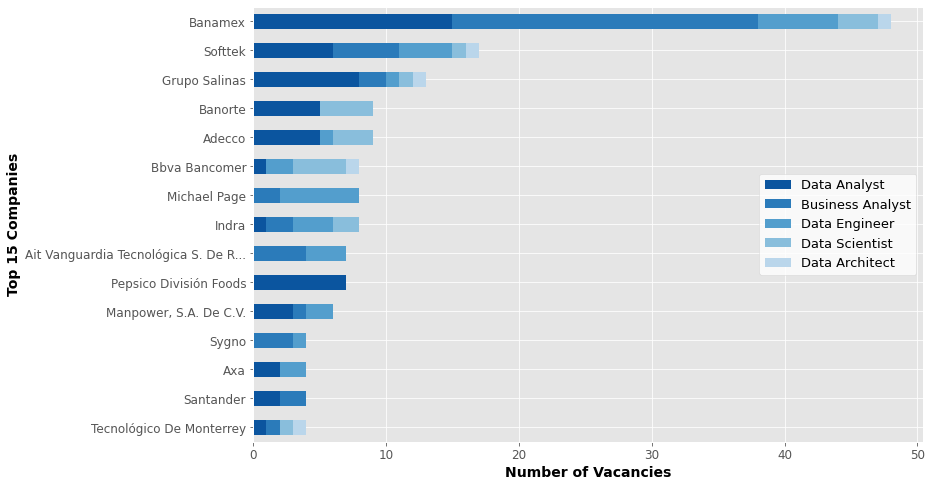

In [109]:
# Top 15 Companies Demanding Data Jobs 
top = 15
company_df[:top].sort_values('Total', ascending = True).set_index('Company').drop(columns = 'Total').plot.barh(stacked=True, 
                                                     y = ['Data Analyst',	'Business Analyst',	'Data Engineer','Data Scientist', 'Data Architect'], 
                                                     color=sns.color_palette('Blues_r'),
                                                     figsize=(12, 8) )
plt.legend(facecolor = 'white', loc = 'center right', fontsize = 13)
plt.xlabel('Number of Vacancies', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel(f'Top {top} Companies', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid({'both'})
plt.show()

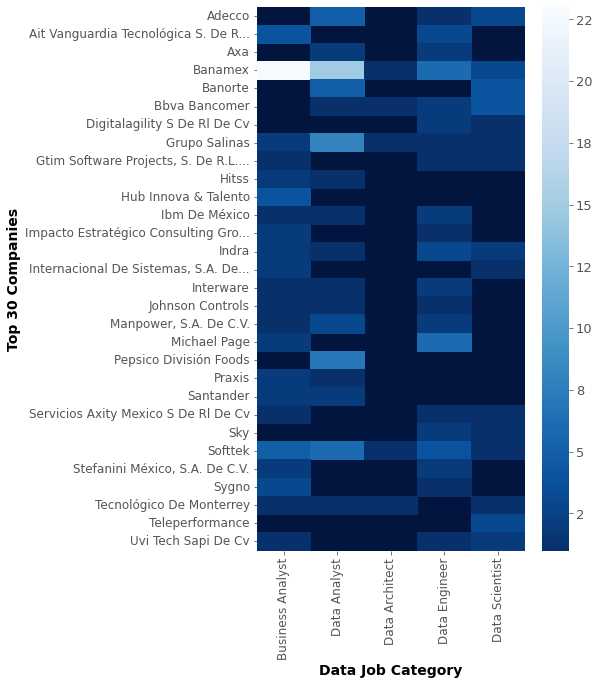

In [110]:
# Heatmap of the top 30 companies demanding data jobs
top = 30
heatmap_companies = company_df[:top].set_index('Company').drop(columns = 'Total').sort_values('Company', ascending = True)
plt.figure(figsize = (6,10))
formatter = mpl.ticker.StrMethodFormatter('{x:,.0f}')
ax = sns.heatmap(heatmap_companies, 
            cmap = "Blues_r",
            mask = (heatmap_companies == 0),
            cbar_kws={"format": formatter})
ax.set_facecolor('xkcd:navy')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel(f'Top {top} Companies', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [111]:
# Heatmap of the top 30 companies demanding data jobs with Plotly
top = 30

heatmap_companies = company_df[:top].set_index('Company').drop(columns = 'Total').sort_values('Company', ascending = False).reset_index()
heatmap_companies = pd.melt(heatmap_companies, id_vars = 'Company', var_name = 'Job', value_name = 'Vacancies')

fig = px.density_heatmap(heatmap_companies, y='Company', 
                          x = 'Job', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          height=900,
                          width=800, 
                          title= f'Demand Per Company & Data Job Category (Top {top})',
                          labels={"Job": "Data Job Category"},
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), font=dict(size=14))
fig.show(config=config)

From the plots above, it is possible to see that, indeed, **Data Analyst** and **Business Analyst** positions are the ones **most demanded** by the companies in Mexico at the moment of this study; whereas **Data Architect** positions are the **less demanded**.

Notwithstanding with the above, the heatmap suggests that **Business Analyst** and **Data Engineer** positions are more demanded across different organizations. On the contrary, **Data Scientist** and, certainly, **Data Architect** vacancies can be found in more specific organizations like tech companies and banks.



### **3.7.  Where Do the Companies Locate?**
___

In [112]:
# Data wrangling for heatmaps
comp_loc = pd.pivot_table(data = df, index = 'Company', columns = 'Location', values = 'Job', aggfunc = 'count').transpose().\
            join(states_df, how = 'outer').drop(columns =['ID']).transpose().fillna(0)            
comp_loc['Total'] = comp_loc.sum(axis=1, numeric_only= True)

# Data with all the companies collected
comp_loc_total = comp_loc.sort_values('Total', ascending = False).drop(columns = 'Total').reset_index().rename(columns = {'index': 'Company'}).\
                sort_values('Company', ascending = True).set_index('Company').astype(float).transpose().sort_index()
comp_loc_total.head()


Company,3F Bienestar Emocional Sa De Cv,"Acepte Soluciones Integrales, S. D...",Adecco,Administración Integral Firpo Izca...,"Aig Seguros Mexico, Sa De C.V.",Ait Vanguardia Tecnológica S. De R...,Alicia Angelica Vazquez Espinoza,"American Express Company México, S...",Anzen Soluciones S.A. De C.V.,Aon Risk Solutions Agente De Segur...,...,Universidad Univer Milenium Del Es...,Ust Global,Uvi Tech Sapi De Cv,Vertiv Mexico,Vidanta,Wiggot Evolucion Inmobiliaria Sapi...,"Wipro Technologies, S.A. De C.V.",Wpp Business Services,"Xaalsa Empresarial, S.A. De C.V.",Zegovia Rh Sa De Cv
Aguascalientes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baja California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baja California Sur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Campeche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chiapas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
# Data with only the top 30 companies
top = 30
comp_loc_top = comp_loc.sort_values('Total', ascending = False)[:top].drop(columns = 'Total').reset_index().rename(columns = {'index': 'Company'}).\
                sort_values('Company', ascending = True).set_index('Company').astype(float)
comp_loc_top.head()


,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
Company,,,,,,,,,,,,,,,,,,,,,
Adecco,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Ait Vanguardia Tecnológica S. De R...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Axa,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banamex,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banorte,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


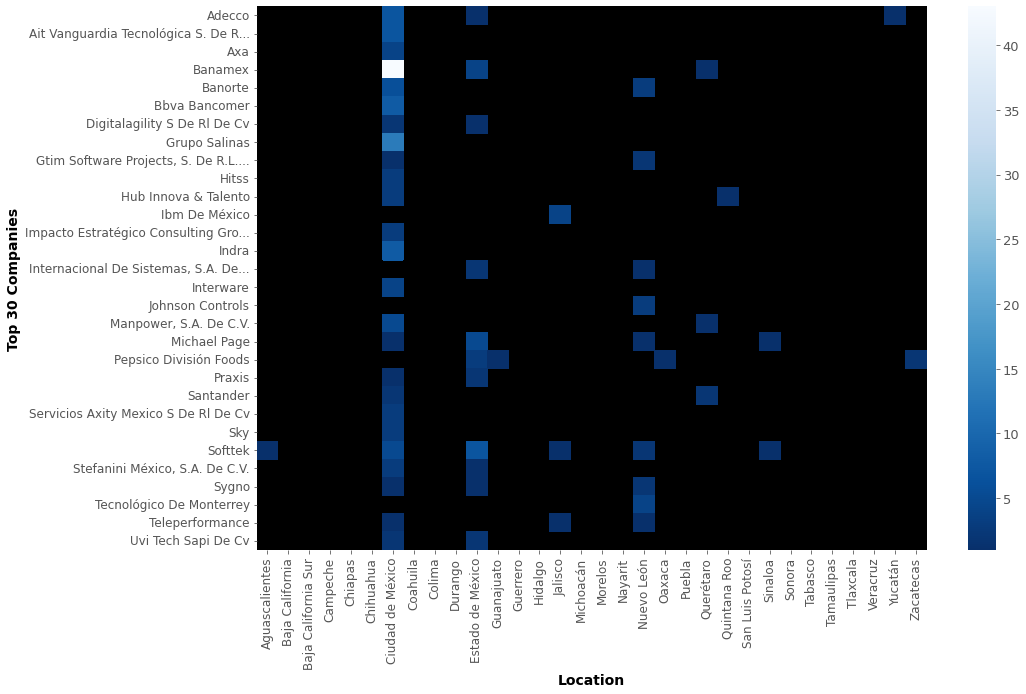

In [114]:
# Heatmap of the top 30 companies demanding data jobs and their locations
plt.figure(figsize = (15,10))
ax = sns.heatmap(comp_loc_top, 
            cmap = "Blues_r",
            mask = (comp_loc_top == 0))
ax.set_facecolor('xkcd:black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
plt.xlabel('Location', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel(f'Top {top} Companies', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [115]:
# Heatmap of the top 30 companies demanding data jobs and their locations with Plotly

comp_loc_top_px = pd.melt(comp_loc_top.reset_index().sort_values(by = 'Company', ascending = False), 
                          id_vars = 'Company', var_name = 'Location', value_name = 'Vacancies')

fig = px.density_heatmap(comp_loc_top_px, y='Company', 
                          x = 'Location', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale,
                          height=800,
                          width=1000, 
                          title= f'Demand Per Company & Location (Top {top})',
                          labels={"Job": "Data Job Category"},
                          )
fig.update_layout( xaxis = go.layout.XAxis( tickangle = 270), title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), font=dict(size=14))
fig.show(config=config)

As expectable, most of the companies locate in **Mexico City** as the large majority of the vacancies are offered there. However, the heatmap shows that there are some organizations that are spread across several Mexicna states such as Banamex, Pepsico, Softek, Sygno and Teleperformance.

Futhermore, there are few well-known companies whose data jobs demand is not located in the capital region, such as IBM (Jalisco), Johnson Controls (Nuevo León) and Tecnológico de Monterrey (Nuevo León).

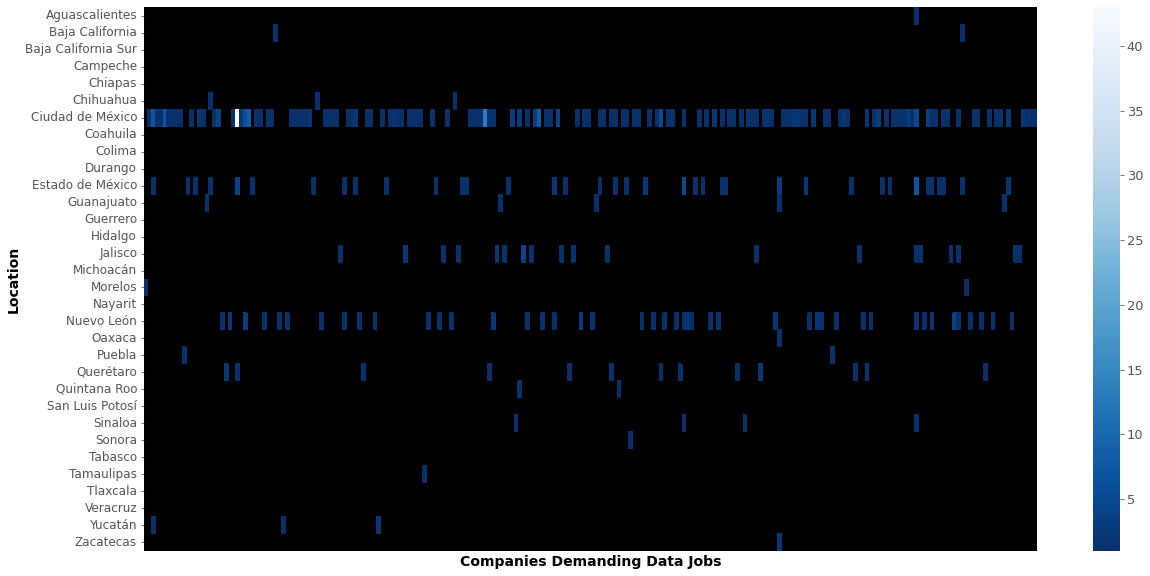

In [116]:
# Heatmap of all companies demanding data jobs and their locations
plt.figure(figsize = (20,10))
ax = sns.heatmap(comp_loc_total, 
            cmap = "Blues_r",
            mask = (comp_loc_total == 0))
ax.set_facecolor('xkcd:black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
plt.xlabel('Companies Demanding Data Jobs', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks([])
plt.yticks(fontsize = 12)
plt.show()

In [117]:
# Heatmap of all companies demanding data jobs and their locations with Plotly
heatmap_px_colorscale2 = [(0, "#000000"), 
                      (0.03, px.colors.sequential.Blues[7]), 
                      (0.25, px.colors.sequential.Blues[6]), 
                      (0.5, px.colors.sequential.Blues[4]), 
                      (0.75, px.colors.sequential.Blues[2]), 
                      (1, "aliceblue")]
comp_loc_total_px = comp_loc_total.reset_index().rename(columns = {'index': 'Location'}).set_index('Location').transpose().\
                    reset_index().sort_values('Company', ascending = True)
comp_loc_total_px = pd.melt(comp_loc_total_px, id_vars = 'Company', var_name= 'Location', value_name = 'Vacancies').sort_values(by='Location', ascending = False)

fig = px.density_heatmap(comp_loc_total_px, y='Location', 
                          x = 'Company', z = 'Vacancies',
                          color_continuous_scale= heatmap_px_colorscale2,
                          height=800,
                          width=1000, 
                          title= 'Demand Per Company & Location',
                         )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Vacancies"), font=dict(size=14))
fig.update_xaxes(showticklabels=False)
fig.show(config=config)

Likewise, the above heatmap beautifully shows that most of the data jobs are concentrated in **Ciudad de México** and, to a lesser extent, in **Estado de México**, **Nuevo León** and **Jalisco**.

### **3.8. Which Data Job Category Has the Highest Salaries?**
___

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job             444 non-null    object 
 1   Company         444 non-null    object 
 2   Location        444 non-null    object 
 3   Average Salary  157 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.0+ KB


In [119]:
salary_df = df.dropna(axis = 0, how='any', subset = ['Average Salary'])
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 441
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job             157 non-null    object 
 1   Company         157 non-null    object 
 2   Location        157 non-null    object 
 3   Average Salary  157 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.1+ KB


In [120]:
salary_df.head()

,Job,Company,Location,Average Salary
0,Data Analyst,P3 Impulsores Estrategicos,Ciudad de México,50000.0
3,Data Analyst,Universidad Tecnológica De México,Ciudad de México,13150.0
5,Data Analyst,Conduent De México Sa De Cv,Chihuahua,8750.0
7,Data Analyst,Grupo Comercial Control,Estado de México,8000.0
8,Data Analyst,"Ediciones Larousse, S.A. De C.V.",Ciudad de México,7500.0


In [121]:
salary_df.describe()

,Average Salary
count,157.000000
mean,31179.347134
std,18589.329627
min,6000.000000
25%,17500.000000
50%,28500.000000
75%,42000.000000
max,95000.000000


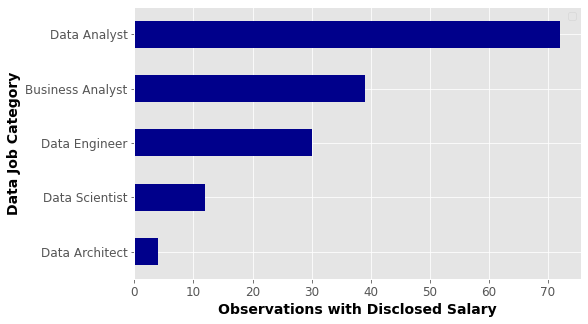

In [122]:
# Count of observations per Data Job Category
obs_per_job = salary_df.groupby('Job')[['Average Salary']].count().rename(columns = {'Average Salary': 'Observations'}).\
              sort_values('Observations', ascending = True)
obs_per_job_plt = obs_per_job.plot.barh(color = 'darkblue', figsize = (8, 5))
plt.legend([])
plt.xlabel('Observations with Disclosed Salary', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Data Job Category', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


In [123]:
# Count of observations per Data Job Category with Plotly

colors = ['#84BDEC',]*5
colors[0] = px.colors.sequential.Blues[8]
fig = px.bar(obs_per_job.reset_index(), x='Observations', y='Job',
             color = 'Observations',
             color_continuous_scale=px.colors.sequential.Blues,
             title= 'Number of Salary Observations Per Data Job Category',
             labels={"Job": "Data Job Category"},
             height = 500,
             width = 700             
             )
fig.update_layout(title_x=0.5, font=dict(size=14))
fig.update_traces(marker_color=colors, marker_line_color=px.colors.sequential.Blues[8],
                  marker_line_width=1, opacity=0.8)
fig.show(config=config)

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



It is necessary to be careful with the salary results for the **Data Architect** positions, as very few observations were collected.

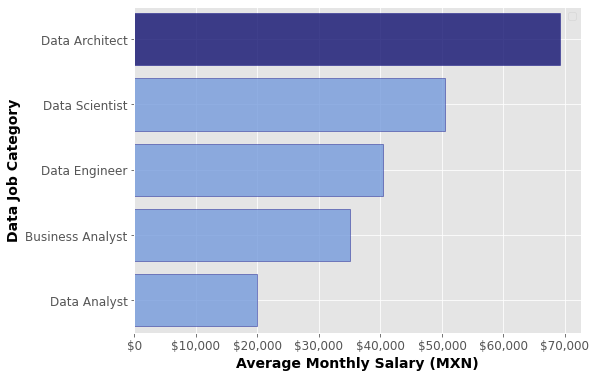

In [124]:
# Average Salary per Data Job Category
salary_per_job = salary_df.groupby('Job')[['Average Salary']].mean().reset_index()
plt.figure(figsize = (8, 6))
ax = sns.barplot(data = salary_per_job, x = 'Average Salary', y = 'Job', 
                 order = ['Data Architect', 'Data Scientist', 'Data Engineer', 'Business Analyst', 'Data Analyst'], 
                 palette = ['navy', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue'],
                 alpha = 0.8, edgecolor='navy')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.legend([])
plt.xlabel('Average Monthly Salary (MXN)', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Data Job Category', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid({'both'})
plt.show()

In [125]:
# Average Salary per Data Job Category with Plotly

colors = ['#84BDEC',]*5
colors[2] = px.colors.sequential.Blues[8]

order = ['Data Analyst', 'Business Analyst', 'Data Engineer', 'Data Scientist', 'Data Architect']

fig = px.bar(salary_per_job.reset_index(), x='Average Salary', y='Job',
             color = 'Average Salary',
             color_continuous_scale=px.colors.sequential.Blues,
             title= 'Average Salary Per Data Job Category',
             labels={"Job": "Data Job Category", 'Average Salary': "Average Monthly Salary (MXN)"},
             height = 500,
             width = 700,
             opacity=0.8        
             )
fig.update_layout(yaxis={'categoryorder':'array', 'categoryarray': order}, title_x=0.5, font=dict(size=14))
fig.update_traces(marker_color=colors, marker_line_color=px.colors.sequential.Blues[8], marker_line_width=1)
fig.update_xaxes(tickformat = '$,~s')
fig.show(config=config)

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Thus, in view of the above plot, **Data Architect** are the positions with the highest salaries with an average of about **70,000 MXN** per month. Nonetheless, it is important to bear in mind that the observations of salaries for those positions were scarce and might no be fully representative. 

Furthermore, **Data Scientist** positions represent the second place with an average monthly salary of about **50,000 MXN**; whereas **Data Analyst** positions are the one with the lowest earnings with an average monthly salary of about **20,000 MXN**.



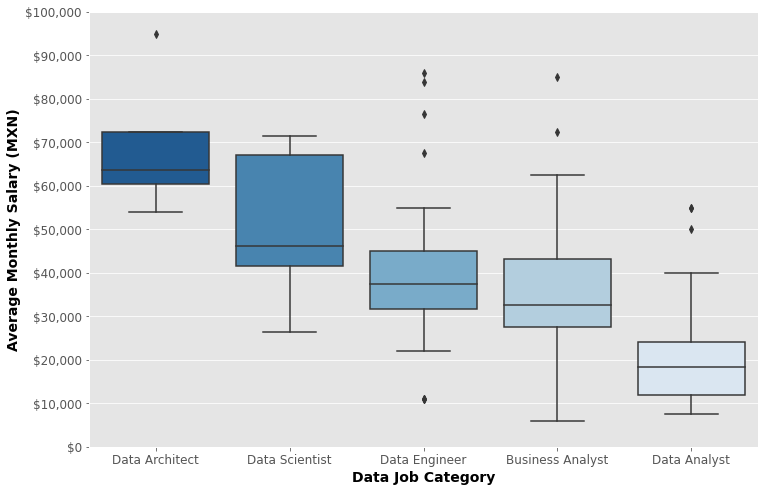

In [126]:
# Box plot for each Data Job Category
plt.figure(figsize = (12,8))
ax = sns.boxplot(data = salary_df, x = 'Job', y = 'Average Salary', 
                 order = ['Data Architect', 'Data Scientist', 'Data Engineer', 'Business Analyst', 'Data Analyst'],
                 palette = 'Blues_r')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(fontsize = 12)
plt.yticks(np.linspace(0,100000,11),fontsize = 12)
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Average Monthly Salary (MXN)', weight = 'bold', fontsize = 14, color = 'black')
plt.show()

In [127]:
# Boxplot with Plotly

fig = px.box(salary_df, x = "Job", y = "Average Salary", 
                          color = "Job", points="all", 
                          color_discrete_sequence=px.colors.sequential.Blues_r,
                          category_orders={"Job": ['Data Architect', 'Data Scientist', 'Data Engineer', 'Business Analyst', 'Data Analyst']},
                          labels={
                                  "Average Salary": "Monthly Salary (MXN)",
                                  "Job": "Data Job Category"},
                          title='Salary Per Data Job Category',
                          height=600,
                          width=700
                          )
fig.update_layout(title_x=0.5, font=dict(size=14))
fig.update_traces(showlegend=False)
fig.update_yaxes(tickformat = '$,~s')
fig.show(config=config)

The boxplot suggests that, after removing outliers from the calculation of the average salaries, **Data Architect** positions are still the ones with the highest salaries in the current Mexican labor market with a monthly average of about **64,000 MXN**. 

The second monthly highest average salary correspond to **Data Scientist** positions with about **45,000 MXN**. 

On the other hand, it was found that **Data Engineer** and **Business Analyst** positions have an average monthly salary of about **38,000 MXN** and about  **33,000 MXN**, respectively.

Finally, **Data Analyst** positions are the ones with the lowest salaries in the Data Jobs labor market with only an average monthly salary of about **19,000 MXN**.  

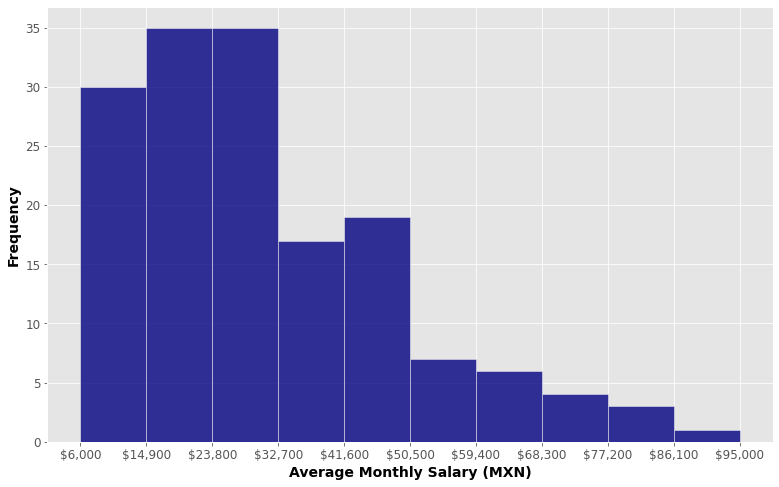

In [128]:
# Salary Distribution
bins = 10
plt.figure(figsize = (13, 8))
ax = sns.histplot(data = salary_df, x = 'Average Salary', 
                 color = 'navy',
                 bins = bins,
                 alpha = 0.8
                )
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xlabel('Average Monthly Salary (MXN)', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Frequency', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(np.linspace(np.min(salary_df['Average Salary']),np.max(salary_df['Average Salary']),bins + 1), fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid({'both'})
plt.show()

In [129]:
# Histrogram with Plotly
minh = np.min(salary_df['Average Salary'])
maxh = np.max(salary_df['Average Salary'])
size = ( maxh - minh )/bins

ticks = list(np.linspace(minh,maxh,bins+1))

fig = px.histogram(salary_df, x = 'Average Salary', nbins= bins, opacity=0.75, 
                   color_discrete_sequence = [px.colors.sequential.Blues_r[0]],
                   title= 'Data Jobs Salary Distribution',
                   labels={"Average Salary": "Average Monthly Salary (MXN)"},
                   height = 600,
                   width = 800
                   )
fig.update_layout(yaxis_title_text='Frequency', bargap=0.01, title_x=0.5, font=dict(size=14))
fig.update_traces(xbins=dict( # bins used for histogram
                  start=minh,
                  end=maxh,
                  size=size
                  ))
fig.update_xaxes(tickvals=ticks, tickformat = '$,~s')
fig.show(config=config)

Most of the Data Jobs salaries are located in the range from 6,000 MXN to 32,700 MXN per month, whereas monthly salaries superior to 32,700 MXN are more scarce. 

On the other hand, it is noteworthy that the salary distributions is skewed to the left. So, it might not comply with the normality assumption.

#### Are the salary observations following a **normal distribution**?

$$\mathbf{H_0}: Normal \; Distribution$$ 

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$


In [130]:
# Kolmogorov-Smirnov test with estimated parameters for Normal distributions
stat, pvalue = std.kstest_fit(salary_df['Average Salary'], dist='norm', pvalmethod='table')
print(f'The D statistic is: {stat:.03f}. \nThe p-value is: {pvalue:.03f}.')

The D statistic is: 0.109. 
The p-value is: 0.001.


Indeed, as the *p*-value is significant ($p < 0.05$), the null hypothesis that the sample comes from a normal distribution is **rejected**. 


Text(0.5, 1.0, 'Data Scientist')

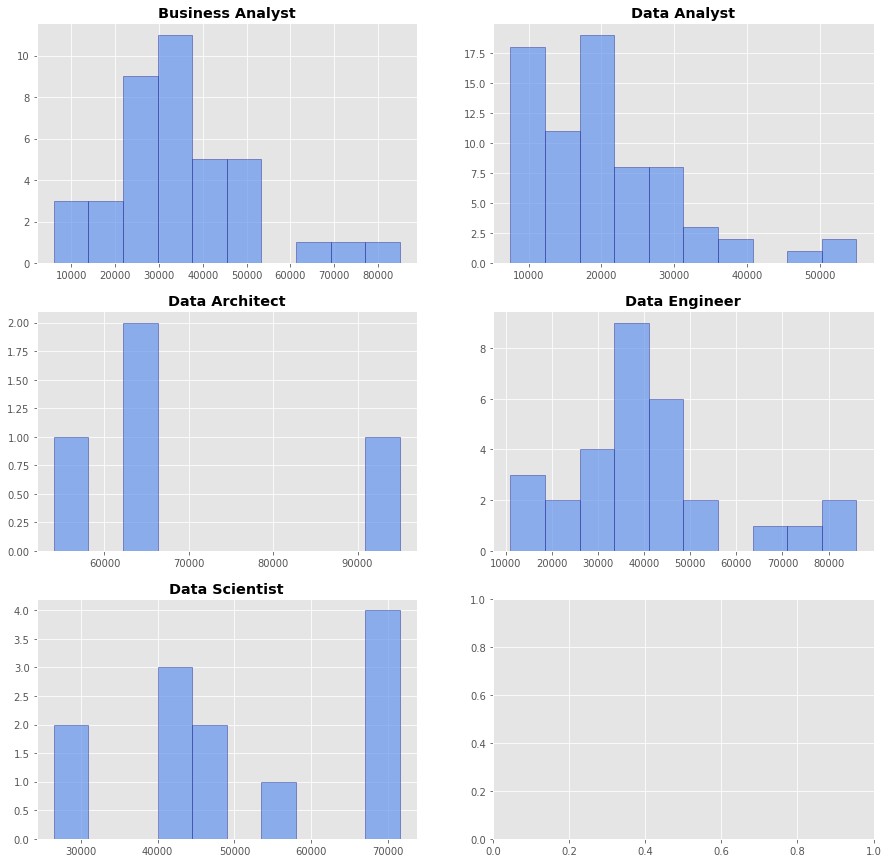

In [131]:
# Salary Distributions for each Data Job Category
salary_df.loc[salary_df['Job'] == 'Data Scientist']

figure, axis = plt.subplots(nrows=3, ncols=2, figsize = (15,15))
axis[0, 0].hist(salary_df.loc[salary_df['Job'] == 'Business Analyst']['Average Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.7)
axis[0, 0].set_title("Business Analyst", weight = 'bold')
axis[0, 1].hist(salary_df.loc[salary_df['Job'] == 'Data Analyst']['Average Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.7)
axis[0, 1].set_title("Data Analyst", weight = 'bold')
axis[1, 0].hist(salary_df.loc[salary_df['Job'] == 'Data Architect']['Average Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.7)
axis[1, 0].set_title("Data Architect", weight = 'bold')
axis[1, 1].hist(salary_df.loc[salary_df['Job'] == 'Data Engineer']['Average Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.7)
axis[1, 1].set_title("Data Engineer", weight = 'bold')
axis[2, 0].hist(salary_df.loc[salary_df['Job'] == 'Data Scientist']['Average Salary'], color = 'cornflowerblue', edgecolor = 'navy', alpha = 0.7)
axis[2, 0].set_title("Data Scientist", weight = 'bold')

In [132]:
# Salary Distributions for each Data Job Category with Plotly
bins = 10
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("Data Analyst", "Business Analyst", "Data Architect", "Data Engineer", "Data Scientist"),
    specs=[[{"colspan": 2}, None],
           [{}, {}],                 
           [{}, {}]]
    )

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Data Analyst']['Average Salary'], nbinsx= bins),
              row=1, col=1)

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Business Analyst']['Average Salary'], nbinsx= bins),
              row=2, col=1)

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Data Architect']['Average Salary'], nbinsx= bins),
              row=2, col=2)

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Data Engineer']['Average Salary'], nbinsx= bins),
              row=3, col=1)

fig.add_trace(go.Histogram(x=salary_df.loc[salary_df['Job'] == 'Data Scientist']['Average Salary'], nbinsx= bins),
              row=3, col=2)

fig.update_layout(height=900, width=800, font=dict(size=13),
                  title_text="Salary Distributions Per Data Job Category",
                  title_x=0.5,
                  bargap=0.02 
                  )
fig.update_traces(marker_color=px.colors.sequential.Blues[7], marker_line_color=px.colors.sequential.Blues[8], 
                  marker_line_width=1, opacity = 0.7, showlegend=False)
fig.update_xaxes(tickformat = '$,~s')
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=1, col=1)
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=2, col=1)
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=2, col=2)
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=3, col=1)
fig.update_xaxes(title_font=dict(size=14), title_text="Average Monthly Salary (MXN)", row=3, col=2)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=2, col=2)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=3, col=1)
fig.update_yaxes(title_font=dict(size=14), title_text="Frequency", row=3, col=2)
fig.show(config=config)

Indeed, only the salary observations for the **Business Analyst** and **Data Engineer** positions resemble a normal distribution, whereas it is not possible to state the same with the observations for the other data job categories. Thus a normal assumption cannot be hold.

Nonetheless, for the purposes of the present study, both parametric (**ANOVA and T-test with unequal variance**) and non-parametric (**Mann-Whitney U and Kruskal-Wallis H**) tests were carried out to assess the significance of the obtained results.

#### Are the salary differences among Data Jobs statistically significant? 

$$\mathbf{H_0}: \mu_{BA} = \mu_{DA} = \mu_{DR} = \mu_{DE} = \mu_{DS}$$

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

In [133]:
salary_pivot_df = pd.pivot_table(salary_df, index = 'Company', columns = 'Job', values = 'Average Salary', aggfunc= 'mean')
salary_pivot_df.head()

Job,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist
Company,,,,,
"Acepte Soluciones Integrales, S. D...",32500.0,NaN,NaN,NaN,NaN
Adecco,NaN,34333.333333,NaN,NaN,42250.0
"Aig Seguros Mexico, Sa De C.V.",NaN,27000.000000,NaN,NaN,NaN
Ait Vanguardia Tecnológica S. De R...,37375.0,NaN,NaN,56950.0,NaN
Alicia Angelica Vazquez Espinoza,NaN,NaN,NaN,30000.0,NaN


In [134]:
# ANOVA with outliers
BA = salary_pivot_df['Business Analyst'].dropna().values
DA = salary_pivot_df['Data Analyst'].dropna().values
DR = salary_pivot_df['Data Architect'].dropna().values
DE = salary_pivot_df['Data Engineer'].dropna().values
DS = salary_pivot_df['Data Scientist'].dropna().values

stat, pvalue = stats.f_oneway(BA, DA, DR, DE, DS)

print(f'The F statistic is: {stat:.03f}. \nThe p-value is: {pvalue:.03f}.\n')

alpha = 0.05
if pvalue > alpha:
	print('Test interpretation: Fail to reject H0.')
else:
	print('Test interpretation: Reject H0.')

The F statistic is: 29.142. 
The p-value is: 0.000.

Test interpretation: Reject H0.


In [135]:
model = smf.ols(formula = "Salary ~ C(Job)", data = salary_df.rename(columns = {'Average Salary': 'Salary'})).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Job),2.250967e+10,4.0,27.242582,4.722714e-17
Residual,3.139818e+10,152.0,NaN,NaN


In [136]:
# Kruskal-Wallis H Test
stat, pvalue = stats.kruskal(BA, DA, DR, DE, DS)

print(f'The H statistic is: {stat:.03f}. \nThe p-value is: {pvalue:.03f}.\n')

alpha = 0.05
if pvalue > alpha:
	print('Test interpretation: Fail to reject H0.')
else:
	print('Test interpretation: Reject H0.')

The H statistic is: 61.502. 
The p-value is: 0.000.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the salary differences among Data Jobs are statistically significant.

#### Are the **Data Architect** salaries significantly higher than those for **Data Scientists**? 

$$\mathbf{H_0}: \mu_{DR} > \mu_{DS}$$

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

In [137]:
# t-test
stat, pvalue = stats.ttest_ind(a = DR, b = DS, equal_var= False, alternative='greater')

# Mann-Whitney U test
stat_np, pvalue_np = stats.mannwhitneyu(DR, DS, alternative='greater')

# Print of results
print(f'T-test: The t statistic is {stat:.03f}; and the p-value is {pvalue:.03f}.\n')
print(f'Mann-Whitney U test: The U statistic is {stat_np:.03f}; and the p-value is {pvalue_np:.03f}.\n')

# Interpretation
alpha = 0.05
if pvalue > alpha and pvalue_np > alpha:
	print('Test interpretation: Fail to reject H0.')
elif pvalue < alpha and pvalue_np < alpha:
	print('Test interpretation: Reject H0.')
else:
    print('Inconsistent results between the tests.')

T-test: The t statistic is 1.869; and the p-value is 0.063.

Mann-Whitney U test: The U statistic is 35.000; and the p-value is 0.106.

Test interpretation: Fail to reject H0.


The obtained *p*-values from both tests are not significant ($p > 0.05$). Therefore, the **Data Architect** salaries are **not significantly higher** than those for **Data Scientists**.

#### Are the **Data Scientist** salaries significantly higher than those for **Data Engineers**? 

$$\mathbf{H_0}: \mu_{DS} > \mu_{DE}$$

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

In [138]:
# t-test
stat, pvalue = stats.ttest_ind(a = DS, b = DE, equal_var= False, alternative='greater')

# Mann-Whitney U test
stat_np, pvalue_np = stats.mannwhitneyu(DS, DE, alternative='greater')

# Print of results
print(f'T-test: The t statistic is {stat:.03f}; and the p-value is {pvalue:.03f}.\n')
print(f'Mann-Whitney U test: The U statistic is {stat_np:.03f}; and the p-value is {pvalue_np:.03f}.\n')

# Interpretation
alpha = 0.05
if pvalue > alpha and pvalue_np > alpha:
	print('Test interpretation: Fail to reject H0.')
elif pvalue < alpha and pvalue_np < alpha:
	print('Test interpretation: Reject H0.')
else:
    print('Inconsistent results between the tests.')

T-test: The t statistic is 1.609; and the p-value is 0.060.

Mann-Whitney U test: The U statistic is 187.000; and the p-value is 0.046.

Inconsistent results between the tests.


The obtained *p*-value from the T-test was not significant ($p > 0.05$); whereas the obtained *p*-value from the Mann-Whitney U test was significant ($p < 0.05$). 

In this context, taking into account that the Data Scientist salary observations do not follow a normal distribution, the results from the Mann-Whitney U test could be deemed as more accurate. However, it is also noteworthy that the *p*-value from this test is too close from the significance level. So, this result must be taken with caution.

Therefore, all in all, the **Data Scientist** salaries are **apparently significantly higher** than those for **Data Engineers**.

#### Are the **Data Scientist** salaries significantly higher than those for **Data Analysts**? 

$$\mathbf{H_0}: \mu_{DS} > \mu_{DA}$$

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

In [139]:
# t-test
stat, pvalue = stats.ttest_ind(a = DS, b = DA, equal_var= False, alternative='greater')

# Mann-Whitney U test
stat_np, pvalue_np = stats.mannwhitneyu(DS, DA, alternative='greater')

# Print of results
print(f'T-test: The t statistic is {stat:.03f}; and the p-value is {pvalue:.03f}.\n')
print(f'Mann-Whitney U test: The U statistic is {stat_np:.03f}; and the p-value is {pvalue_np:.03f}.\n')

# Interpretation
alpha = 0.05
if pvalue > alpha and pvalue_np > alpha:
	print('Test interpretation: Fail to reject H0.')
elif pvalue < alpha and pvalue_np < alpha:
	print('Test interpretation: Reject H0.')
else:
    print('Inconsistent results between the tests.')

T-test: The t statistic is 6.636; and the p-value is 0.000.

Mann-Whitney U test: The U statistic is 736.500; and the p-value is 0.000.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Data Scientist** salaries are **significantly higher** than those for **Data Analysts**.

#### Are the **Data Engineer** salaries significantly higher than those for **Business Analysts**? 

$$\mathbf{H_0}: \mu_{DE} > \mu_{BA}$$

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

In [140]:
# t-test
stat, pvalue = stats.ttest_ind(a = DE, b = BA, equal_var= False, alternative='greater')

# Mann-Whitney U test
stat_np, pvalue_np = stats.mannwhitneyu(DE, BA, alternative='greater')

# Print of results
print(f'T-test: The t statistic is {stat:.03f}; and the p-value is {pvalue:.03f}.\n')
print(f'Mann-Whitney U test: The U statistic is {stat_np:.03f}; and the p-value is {pvalue_np:.03f}.\n')

# Interpretation
alpha = 0.05
if pvalue > alpha and pvalue_np > alpha:
	print('Test interpretation: Fail to reject H0.')
elif pvalue < alpha and pvalue_np < alpha:
	print('Test interpretation: Reject H0.')
else:
    print('Inconsistent results between the tests.')

T-test: The t statistic is 1.888; and the p-value is 0.033.

Mann-Whitney U test: The U statistic is 458.500; and the p-value is 0.011.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Data Engineer** salaries are **significantly higher** than those for **Business Analysts**.

#### Are the **Data Architect** salaries significantly higher than those for **Data Engineers**? 

$$\mathbf{H_0}: \mu_{DR} > \mu_{DE}$$

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

In [141]:
# t-test
stat, pvalue = stats.ttest_ind(a = DR, b = DE, equal_var= False, alternative='greater')

# Mann-Whitney U test
stat_np, pvalue_np = stats.mannwhitneyu(DR, DE, alternative='greater')

# Print of results
print(f'T-test: The t statistic is {stat:.03f}; and the p-value is {pvalue:.03f}.\n')
print(f'Mann-Whitney U test: The U statistic is {stat_np:.03f}; and the p-value is {pvalue_np:.03f}.\n')

# Interpretation
alpha = 0.05
if pvalue > alpha and pvalue_np > alpha:
	print('Test interpretation: Fail to reject H0.')
elif pvalue < alpha and pvalue_np < alpha:
	print('Test interpretation: Reject H0.')
else:
    print('Inconsistent results between the tests.')

T-test: The t statistic is 2.899; and the p-value is 0.021.

Mann-Whitney U test: The U statistic is 81.000; and the p-value is 0.009.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Data Architect** salaries are **significantly higher** than those for **Data Engineers**.

#### Are the **Data Scientist** salaries significantly higher than those for **Business Analysts**? 

$$\mathbf{H_0}: \mu_{DS} > \mu_{BA}$$

$$\mathbf{H_1}: Not \; H_0$$

$$\alpha = 0.05$$

In [142]:
# t-test
stat, pvalue = stats.ttest_ind(a = DS, b = BA, equal_var= False, alternative='greater')

# Mann-Whitney U test
stat_np, pvalue_np = stats.mannwhitneyu(DS, BA, alternative='greater')

# Print of results
print(f'T-test: The t statistic is {stat:.03f}; and the p-value is {pvalue:.03f}.\n')
print(f'Mann-Whitney U test: The U statistic is {stat_np:.03f}; and the p-value is {pvalue_np:.03f}.\n')

# Interpretation
alpha = 0.05
if pvalue > alpha and pvalue_np > alpha:
	print('Test interpretation: Fail to reject H0.')
elif pvalue < alpha and pvalue_np < alpha:
	print('Test interpretation: Reject H0.')
else:
    print('Inconsistent results between the tests.')

T-test: The t statistic is 3.423; and the p-value is 0.001.

Mann-Whitney U test: The U statistic is 279.500; and the p-value is 0.001.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Data Scientist** salaries are **significantly higher** than those for **Business Analysts**.

#### Are the **Business Analysts** salaries significantly higher than those for **Data Analysts**? 

$$\mathbf{H_0}: \mu_{BA} > \mu_{DA}$$

$$\mathbf{H_1}: Not \; H_0$$ 

$$\alpha = 0.05$$

In [143]:
# t-test
stat, pvalue = stats.ttest_ind(a = BA, b = DA, equal_var= False, alternative='greater')

# Mann-Whitney U test
stat_np, pvalue_np = stats.mannwhitneyu(BA, DA, alternative='greater')

# Print of results
print(f'T-test: The t statistic is {stat:.03f}; and the p-value is {pvalue:.03f}.\n')
print(f'Mann-Whitney U test: The U statistic is {stat_np:.03f}; and the p-value is {pvalue_np:.03f}.\n')

# Interpretation
alpha = 0.05
if pvalue > alpha and pvalue_np > alpha:
	print('Test interpretation: Fail to reject H0.')
elif pvalue < alpha and pvalue_np < alpha:
	print('Test interpretation: Reject H0.')
else:
    print('Inconsistent results between the tests.')

T-test: The t statistic is 4.216; and the p-value is 0.000.

Mann-Whitney U test: The U statistic is 1461.500; and the p-value is 0.000.

Test interpretation: Reject H0.


The obtained *p*-values from both tests are significant ($p < 0.05$). Therefore, the **Business Analyst** salaries are **significantly higher** than those for **Data Analysts**.

### **3.9. Where the Highest Salaries Can Be Found?**
___

In [144]:
salary_location = pd.pivot_table(data = salary_df, index = 'Location', columns = 'Job', values = 'Average Salary', aggfunc= 'mean').\
    join(states_df, how = 'outer').drop(columns =['ID']).fillna(0)
salary_location = salary_location.sort_index(ascending= True)
salary_location.head()

,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist
Aguascalientes,0.0,0.0,0.0,0.0,0.0
Baja California,21200.5,0.0,0.0,11000.0,0.0
Baja California Sur,0.0,0.0,0.0,0.0,0.0
Campeche,0.0,0.0,0.0,0.0,0.0
Chiapas,0.0,0.0,0.0,0.0,0.0


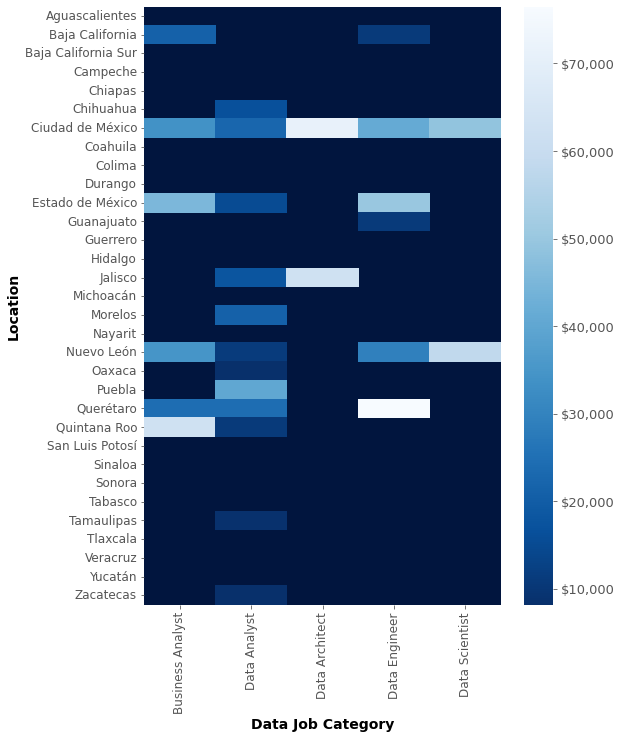

In [145]:
# Heatmap of the Salaries per Data Job category and Location
plt.figure(figsize = (8,11))
formatter = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax = sns.heatmap(salary_location, 
            cmap = "Blues_r",
            mask = (salary_location == 0),
            cbar_kws={"format": formatter})
ax.set_facecolor('xkcd:navy')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [146]:
# Contour Plot of the Salaries per Data Job category and Location with Plotly
salary_location_px = salary_location.rename_axis('Location').reset_index()
salary_location_px = pd.melt(salary_location_px, id_vars= 'Location', var_name = 'Job', value_name = 'Salary')
salary_location_px = salary_location_px.sort_values('Location', ascending = False)

fig = px.density_contour(salary_location_px, y='Location', x = 'Job', z = 'Salary',
                          histfunc="avg", 
                          #color_continuous_scale="Blues"
                          color_discrete_sequence=px.colors.sequential.Blues_r,
                          height=800,
                          width=800,
                          title='Salary Per Location And Data Job Category',
                          labels={
                                  'Job': 'Data Job Category'
                                  }
                          )
fig.update_layout(title_x=0.5, font=dict(size=14))
fig.update_traces(contours_coloring="fill", contours_showlabels = True, colorscale = 'Blues', colorbar_tickformat='$,~s',
                colorbar_title_text='Monthly Salary (MXN)')
fig.show(config=config)

In [147]:
# Heatmap of the Salaries per Data Job category and Location with Plotly
salary_location_px = salary_location.rename_axis('Location').reset_index()
salary_location_px = pd.melt(salary_location_px, id_vars= 'Location', var_name = 'Job', value_name = 'Salary')
salary_location_px = salary_location_px.sort_values('Location', ascending = False)

fig = px.density_heatmap(salary_location_px, y='Location', x = 'Job', z = 'Salary',
                          histfunc="avg", 
                          color_continuous_scale=heatmap_px_colorscale,
                          #color_continuous_scale="Blues",
                          height=800,
                          width=800,
                          title='Salary Per Location And Data Job Category',
                          labels={
                                  'Job': 'Data Job Category'
                                  }
                          )
fig.update_layout(title_x=0.5, font=dict(size=14), coloraxis_colorbar=dict(title="Monthly Salary (MXN)"))
fig.update_traces(colorbar_title_text='Monthly Salary (MXN)')
fig.update_coloraxes(colorbar_tickformat = '$,~s')
fig.update_xaxes(categoryorder='array', categoryarray= ['Business Analyst', 'Data Analyst', 'Data Architect', 'Data Engineer', 'Data Scientist'])
fig.show(config=config)

In general, the above plot suggests that the highest salaries can be found in **Mexico City, Estado de Mexico, Nuevo León, Querétaro and Quintana Roo**. However the observation for the latter state is atypical and should be interpreted with caution.

More specifically, the highest salaries for the different data jobs categories can be found in the following states:

Data Job Category | Locations with the Highest Average Salaries
---|---
Business Analyst | Estado de México, Quintana Roo
Data Analyst | Puebla, Querétaro
Data Architect | Ciudad de México, Jalisco
Data Engineer | Querétaro, Estado de México
Data Scientist | Nuevo León, Ciudad de México



In [148]:
salary_location_top = salary_location.loc[['Ciudad de México', 'Estado de México', 'Nuevo León', 'Jalisco']].reset_index().rename(columns={'index': 'Location'})
salary_location_top = pd.melt(salary_location_top, id_vars= 'Location', value_vars = ['Business Analyst',	'Data Analyst',	'Data Architect',	'Data Engineer','Data Scientist'], 
                            var_name= 'Job', value_name='Salary')
salary_location_top.head()

,Location,Job,Salary
0,Ciudad de México,Business Analyst,33880.357143
1,Estado de México,Business Analyst,45125.000000
2,Nuevo León,Business Analyst,34666.666667
3,Jalisco,Business Analyst,0.000000
4,Ciudad de México,Data Analyst,22474.077778


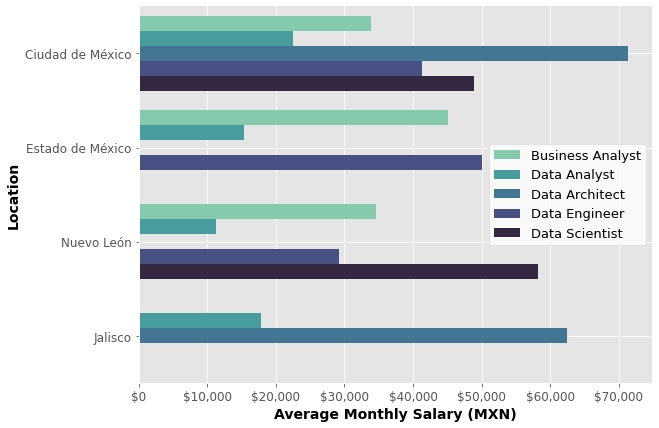

In [149]:
# Grouped bar chart of each data job for selected states
g = sns.catplot(
    data = salary_location_top, kind = "bar",
    x = "Salary", y = "Location", hue = "Job",
    ci = "sd", palette = "mako_r", alpha = 1, height = 6,
    aspect = 1.5, legend = False
)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.legend(facecolor = 'white', loc = 'center right', fontsize = 13)
plt.xlabel('Average Monthly Salary (MXN)', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid({'both'})
plt.show()

In [150]:
# Grouped bar chart of each data job for selected states with Plotly
order = ['Jalisco', 'Nuevo León', 'Estado de México', 'Ciudad de México']
fig = px.bar(salary_location_top, x= 'Salary', 
             y='Location', color = 'Job',
            color_discrete_sequence=px.colors.sequential.Blues_r,
            height = 600,
            width = 800,
            title = 'Average Salary Per Data Job Category In the Most Important States',
            labels = {"Salary": "Average Monthly Salary (MXN)", "Job": "Data Job Category"},
             barmode='group'#'stack'
             )
fig.update_layout(yaxis={'categoryorder':'array', 'categoryarray': order}, title_x=0.5, font=dict(size=14))
fig.update_xaxes(tickformat = '$,~s')
fig.show(config=config)

In [151]:
# Average monthly salaries in the top locations
avg_mth_salary_top = salary_location_top.pivot(index = 'Location', columns= 'Job')
avg_mth_salary_top = avg_mth_salary_top.replace(0, np.nan)
avg_mth_salary_top['total'] = avg_mth_salary_top.mean(axis = 1, numeric_only = True)
avg_mth_salary_top

Salary                                             \
Job              Business Analyst  Data Analyst Data Architect Data Engineer   
Location                                                                       
Ciudad de México     33880.357143  22474.077778   71333.333333  41243.181818   
Estado de México     45125.000000  15339.285714            NaN  50000.000000   
Jalisco                       NaN  17861.250000   62500.000000           NaN   
Nuevo León           34666.666667  11300.000000            NaN  29250.000000   

                                        total  
Job              Data Scientist                
Location                                       
Ciudad de México        48865.0  43559.190014  
Estado de México            NaN  36821.428571  
Jalisco                     NaN  40180.625000  
Nuevo León              58250.0  33366.666667

For the selected states above, which exhibit the largest labor demand,  the highest salaries for the different data jobs categories can be found as follows:

Data Job Category | Locations with the Highest Average Salaries
---|---
Business Analyst | Estado de México
Data Analyst | Ciudad de México
Data Architect | Ciudad de México
Data Engineer | Estado de México
Data Scientist | Nuevo León

### **3.10. What Companies Offer the Highest Salaries?**
___

In [152]:
salary_company = pd.pivot_table(salary_df, index = 'Company', columns = 'Job', values = 'Average Salary', aggfunc= 'mean')
salary_company['Total Average'] = salary_company.mean(axis=1, numeric_only= True)

# All companies
salary_company = salary_company.fillna(0).sort_values('Total Average', ascending = False).sort_values('Company', ascending = True)
salary_company.head()

Job,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total Average
Company,,,,,,
"Acepte Soluciones Integrales, S. D...",32500.0,0.000000,0.0,0.0,0.0,32500.000000
Adecco,0.0,34333.333333,0.0,0.0,42250.0,38291.666667
"Aig Seguros Mexico, Sa De C.V.",0.0,27000.000000,0.0,0.0,0.0,27000.000000
Ait Vanguardia Tecnológica S. De R...,37375.0,0.000000,0.0,56950.0,0.0,47162.500000
Alicia Angelica Vazquez Espinoza,0.0,0.000000,0.0,30000.0,0.0,30000.000000


In [153]:
# Top companies
top = 30
salary_company_top = salary_company.fillna(0).sort_values('Total Average', ascending = False)[:top].sort_values('Company', ascending = True)
salary_company_top.head()

Job,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total Average
Company,,,,,,
Adecco,0.0,34333.333333,0.0,0.0,42250.0,38291.666667
Ait Vanguardia Tecnológica S. De R...,37375.0,0.000000,0.0,56950.0,0.0,47162.500000
Anzen Soluciones S.A. De C.V.,0.0,0.000000,0.0,67500.0,0.0,67500.000000
"Atento Servicios, S. A. De C.V.",0.0,55000.000000,0.0,0.0,0.0,55000.000000
Axented Digital Communications Sa ...,0.0,0.000000,0.0,0.0,69000.0,69000.000000


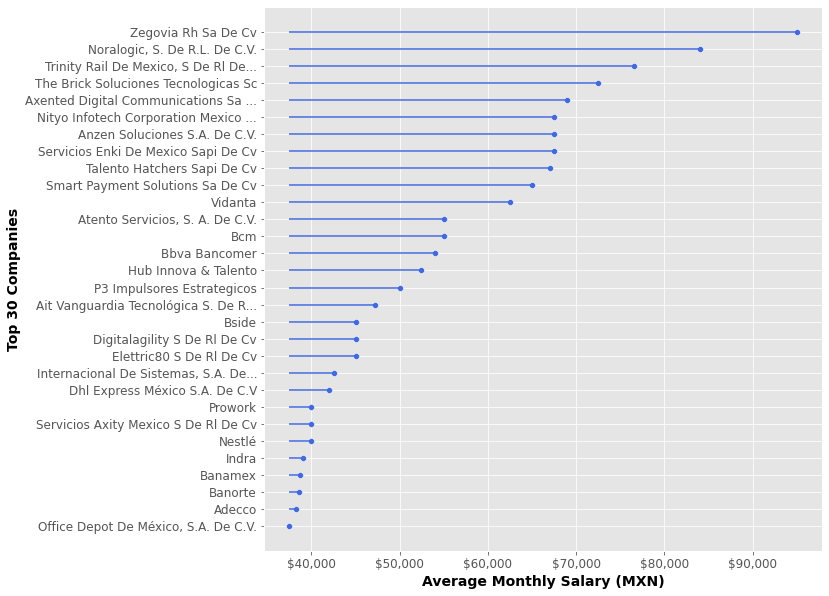

In [154]:
# Companies paying the highest salaries
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data = salary_company_top.sort_values('Total Average', ascending= False),
                    x = 'Total Average',
                    y = 'Company',
                    color = 'royalblue'
                    )
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
for index, value in salary_company_top.sort_values('Total Average')['Total Average'].iteritems():
    plt.hlines(xmax = value, xmin = np.min(salary_company_top['Total Average']), y = index, color='royalblue')  # Stems
plt.xlabel('Average Monthly Salary (MXN)', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel(f'Top {top} Companies', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [155]:
# Companies paying the highest salaries with Plotly
salary_company_top_px = salary_company_top.sort_values('Total Average', ascending= True).reset_index()

fig = px.scatter(salary_company_top_px, x='Total Average', y='Company',
                 height = 900,
                 width = 900,
                 title = f'Top {top} Companies Paying The Highest Salaries',
                 labels = {'Total Average':'Average Monthly Salary (MXN)'},
                 )

fig.update_layout(title_x=0.5, font=dict(size=14))
fig.update_traces(marker_color=px.colors.sequential.Blues[7], marker_line_color=px.colors.sequential.Blues[7])
fig.update_xaxes(tickformat = '$,~s')

for index, value in salary_company_top.sort_values('Total Average', ascending = True)['Total Average'].reset_index().iterrows():
  fig.add_shape(type='line', y0=index, y1= index, x0=np.min(salary_company_top['Total Average']), x1= value[1], xref='x',
                yref='y', line=dict(color= px.colors.sequential.Blues[7]))

fig.show(config=config)

From the plot above, the companies offering the highest salaries are Zegovia RH, Noralogic and Trinity Rail de México. On the other hand, it is noteworthy that, from the banking sector, BBVA Bancomer is the bank offering the highest salaries. 

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



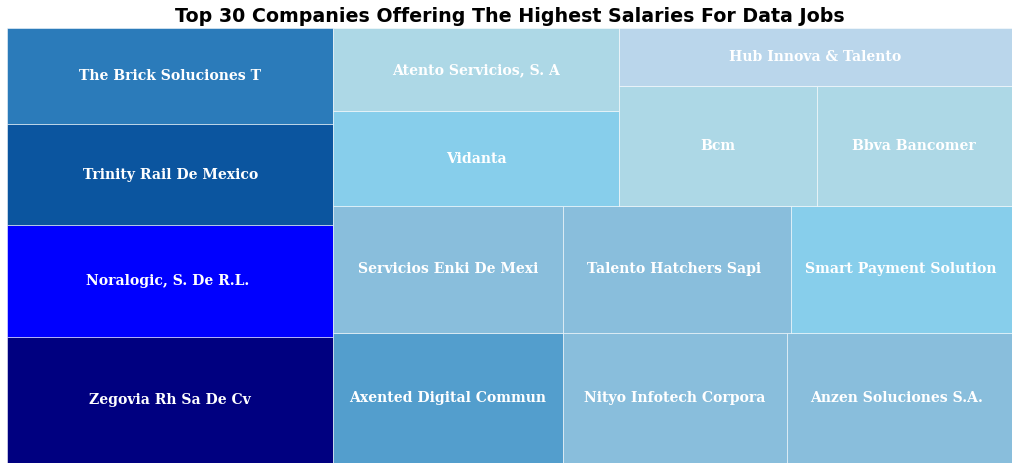

In [156]:
# Treemap of the top 15 companies offering the highest salaries for data jobs
top_treemap = 15
tm_salary_company_top = salary_company_top.sort_values('Total Average', ascending = False)[:top_treemap]
sizes = tm_salary_company_top['Total Average'].values
label = tm_salary_company_top.index.map(lambda x: x[:22])
colors = sns.color_palette('Blues_r')
colors_tree =['navy', 'blue', colors[0], colors[1], colors[2], colors[3], colors[3], colors[3], colors[3], 'skyblue', 'skyblue', 'lightblue', 'lightblue', 'lightblue', colors[4]]
plt.figure(figsize = (18,8))
squarify.plot(sizes = sizes, label = label, 
              alpha = 1, color = colors_tree, pad = 0, 
              text_kwargs={'fontsize': 14, 'weight': 'bold', 'family':'serif', 'color': 'w'},
              edgecolor = 'w')
plt.title(f'Top {top} Companies Offering The Highest Salaries For Data Jobs', weight = 'bold', fontsize = 19)
plt.axis('Off')
plt.show()

In [157]:
# Treemap of the top 15 companies offering the highest salaries for data jobs with Plotly
tm_salary_company_top_px = tm_salary_company_top
tm_salary_company_top_px.index = tm_salary_company_top_px.index.map(lambda x: x[:15])
fig = px.treemap(tm_salary_company_top_px.reset_index(), path = [px.Constant("."), 'Company'], values='Total Average', color = 'Total Average', 
                                  color_continuous_scale=px.colors.sequential.Blues,
                                  title= f'Top {top_treemap} Companies Offering The Highest Salaries For Data Jobs',
                                  height= 600,
                                  width = 1000
                                 )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Monthly Salary (MXN)"), font=dict(size=14))
fig.update_coloraxes(colorbar_tickformat = '$,~s')
fig.show(config=config)

### **3.11. What Companies Offer the Highest Salaries Per Data Job Category?**
___

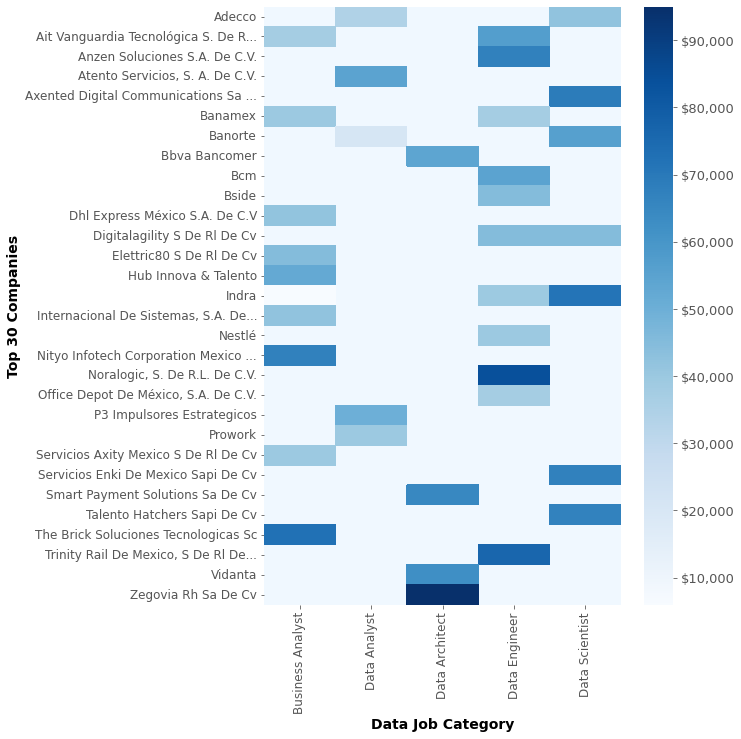

In [158]:
# Heatmap of the Companies Offering the Highest Salaries Per Data Job Category
plt.figure(figsize = (8,11))
formatter = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax = sns.heatmap(data = salary_company_top.drop(columns = 'Total Average'),
                cmap = 'Blues',
                mask = (salary_company_top.drop(columns = 'Total Average') == 0),
                cbar_kws={"format": formatter}
                )
ax.set_facecolor('aliceblue')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel(f'Top {top} Companies', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [159]:
# Heatmap of the Companies Offering the Highest Salaries Per Data Job Category with Plotly
top = 30
salary_company_df = salary_company_top[:top].reset_index().drop(columns = 'Total Average')
salary_company_df = pd.melt(salary_company_df, id_vars = 'Company', var_name = 'Job', value_name = 'Salary')

fig = px.density_heatmap(salary_company_df.sort_values(by = 'Company', ascending = False), y='Company', x = 'Job', z = 'Salary',
                          histfunc="avg", 
                          color_continuous_scale=heatmap_px_colorscale,
                          #color_continuous_scale="Blues",
                          height=900,
                          width=900, 
                          title= f'Salary Per Company And Data Job Category (Top {top})',
                          labels={"Job": "Data Job Category"}
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Monthly Salary (MXN)"), font=dict(size=14))
fig.update_xaxes(categoryorder='array', categoryarray= ['Business Analyst', 'Data Analyst', 'Data Architect', 'Data Engineer', 'Data Scientist'])
fig.update_coloraxes(colorbar_tickformat = '$,~s')
fig.show(config=config)

For **Business Analyst** positions, the organizations offering higher salaries are The Brick Soluciones and Nityo Infotech.

Moreover, for **Data Analyst** positions, the organizations offering higher salaries are Atento Servicios and P3 Impulsores Estratégicos.

Furthermore, for **Data Architect** positions, the organizations offering higher salaries are Zegovia RH and Smart Payments.

In addition, for **Data Engineer** positions, the organizations offering higher salaries are Noralogic and Trinity Rail.

Finally, for **Data Scientist** positions, the organizations offering higher salaries are Indra, Axented, Servicios Enki and Talento Hatchers.


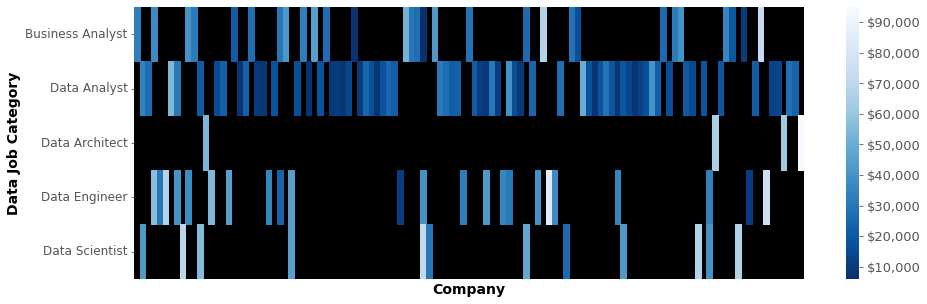

In [160]:
# Heatmap of the Salaries by Data Job Category
plt.figure(figsize = (15,5))
formatter = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax = sns.heatmap(data = salary_company.drop(columns = 'Total Average').transpose(),
                cmap = 'Blues_r',
                mask = (salary_company.drop(columns = 'Total Average').transpose() == 0),
                cbar_kws={"format": formatter})
ax.set_facecolor('black')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=13)
plt.xlabel('Company', weight = 'bold', fontsize = 14, color = 'black')
plt.ylabel('Data Job Category', weight = 'bold', fontsize = 14, color = 'black')
plt.xticks([])
plt.yticks(fontsize = 12)
plt.show()

In [161]:
# Heatmap of the Salaries by Data Job Category with Plotly
heatmap_salary_job = salary_company.drop(columns = 'Total Average').reset_index()
heatmap_salary_job = pd.melt(heatmap_salary_job, id_vars = 'Company', var_name='Job', value_name = 'Salary')
fig = px.density_heatmap(heatmap_salary_job.sort_values(by= 'Job', ascending = False), y='Job', 
                          x = 'Company', z = 'Salary',
                          histfunc = 'avg',
                          color_continuous_scale= heatmap_px_colorscale,
                          height=500,
                          width=900, 
                          title= 'Salaries by Data Job Category & Company',
                          labels={"Job": "Data Job Category"},
                          )
fig.update_layout(title_x=0.5, coloraxis_colorbar=dict(title="Monthly Salary (MXN)"), font=dict(size=14))
fig.update_xaxes(showticklabels=False)
fig.update_coloraxes(colorbar_tickformat = '$,~s')
fig.show(config=config)

The heatmap above suggests that, overall, individual observed companies do offer higher salaries for **Data Architect** and **Data Scientist** positions than those for **Data Analyst** or **Business Analyst** positions.

In [162]:
#End